**1. Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

# Stochastic model forecasting
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Auto ARIMA: optimal parameters
from pmdarima import auto_arima

# ARIMA model 
from statsmodels.tsa.arima.model import ARIMA

# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [2]:
# pip install pmdarima

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Load the Dataset**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/Time_series_analysis_and_forecast_DATASET.csv")

In [5]:
df

FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]

In [6]:
df.shape

(92016, 5)

In [7]:
df.isnull().sum()
# No nulls in the dataset

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
df_copy = df.copy()

In [9]:
df_copy

FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]

**3. Data Preprocessing**

In [10]:
df_copy['FullDate']

0        2010-09-01 00:00:00
1        2010-09-01 01:00:00
2        2010-09-01 02:00:00
3        2010-09-01 03:00:00
4        2010-09-01 04:00:00
                ...         
92011    2021-02-28 19:00:00
92012    2021-02-28 20:00:00
92013    2021-02-28 21:00:00
92014    2021-02-28 22:00:00
92015    2021-02-28 23:00:00
Name: FullDate, Length: 92016, dtype: object

In [11]:
type(df_copy['FullDate'])

pandas.core.series.Series

In [12]:
# Converting 'FullDate' column to datetime type
df_copy['FullDate'] = pd.to_datetime(df_copy['FullDate'])

In [13]:
type(df_copy['FullDate'])

pandas.core.series.Series

In [14]:
df_copy['ElecPrice']

0         23.710
1         22.635
2         22.565
3         18.910
4         18.030
          ...   
92011    117.925
92012     87.880
92013     62.060
92014     62.000
92015     62.955
Name: ElecPrice, Length: 92016, dtype: float64

In [15]:
# Set entries of 'FullDate' as index of DataFrame
df_copy.set_index("FullDate", inplace = True)

In [16]:
df_copy

Tmax     SysLoad  GasPrice  ElecPrice
FullDate                                                  
2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                   ...         ...       ...        ...
2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 4 columns]

In [17]:
df_copy.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'], inplace = True)

In [18]:
df_copy

ElecPrice
FullDate                      
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
...                        ...
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955

[92016 rows x 1 columns]

In [19]:
max(df_copy['ElecPrice'])

14700.0

In [20]:
df_copy[df_copy['ElecPrice']==14700.0]

ElecPrice
FullDate                      
2019-12-19 19:00:00    14700.0

In [21]:
df_copy['ElecPrice']

FullDate
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
                        ...   
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955
Name: ElecPrice, Length: 92016, dtype: float64

In [22]:
df_copy.index

DatetimeIndex(['2010-09-01 00:00:00', '2010-09-01 01:00:00',
               '2010-09-01 02:00:00', '2010-09-01 03:00:00',
               '2010-09-01 04:00:00', '2010-09-01 05:00:00',
               '2010-09-01 06:00:00', '2010-09-01 07:00:00',
               '2010-09-01 08:00:00', '2010-09-01 09:00:00',
               ...
               '2021-02-28 14:00:00', '2021-02-28 15:00:00',
               '2021-02-28 16:00:00', '2021-02-28 17:00:00',
               '2021-02-28 18:00:00', '2021-02-28 19:00:00',
               '2021-02-28 20:00:00', '2021-02-28 21:00:00',
               '2021-02-28 22:00:00', '2021-02-28 23:00:00'],
              dtype='datetime64[ns]', name='FullDate', length=92016, freq=None)

In [23]:
df_copy.ElecPrice

FullDate
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
                        ...   
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955
Name: ElecPrice, Length: 92016, dtype: float64

3.1 Visualization

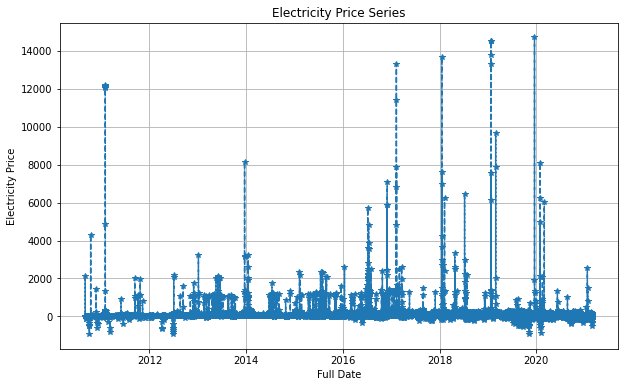

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_copy.index, df_copy.ElecPrice, '--', marker = "*", )
plt.grid()
plt.title("Electricity Price Series")
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()

3.2 Resampling

In [25]:
# Downsample to 'Daily' data points(day wise)
df_daily = df_copy.resample('D').mean()

In [26]:
df_copy

ElecPrice
FullDate                      
2010-09-01 00:00:00     23.710
2010-09-01 01:00:00     22.635
2010-09-01 02:00:00     22.565
2010-09-01 03:00:00     18.910
2010-09-01 04:00:00     18.030
...                        ...
2021-02-28 19:00:00    117.925
2021-02-28 20:00:00     87.880
2021-02-28 21:00:00     62.060
2021-02-28 22:00:00     62.000
2021-02-28 23:00:00     62.955

[92016 rows x 1 columns]

In [27]:
df_daily

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458
...                ...
2021-02-24   26.448750
2021-02-25   24.063125
2021-02-26   60.228958
2021-02-27   20.374167
2021-02-28   -4.124375

[3834 rows x 1 columns]

In [28]:
len(df_daily)

3834

In [29]:
max(df_daily['ElecPrice'])

3358.6

In [30]:
df_daily[df_daily['ElecPrice']==3358.6]

ElecPrice
FullDate             
2019-01-24     3358.6

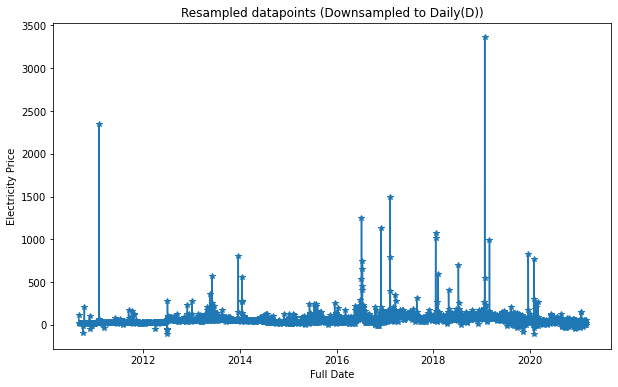

In [31]:
plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily.ElecPrice, '-', marker = '*')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.title("Resampled datapoints (Downsampled to Daily(D))")
plt.show()

3.3 Moving Average

In [32]:
df_MA = df_daily.copy()

In [33]:
df_MA

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458
...                ...
2021-02-24   26.448750
2021-02-25   24.063125
2021-02-26   60.228958
2021-02-27   20.374167
2021-02-28   -4.124375

[3834 rows x 1 columns]

In [34]:
MA = df_MA['ElecPrice'].rolling(12).mean()

In [35]:
MA

FullDate
2010-09-01          NaN
2010-09-02          NaN
2010-09-03          NaN
2010-09-04          NaN
2010-09-05          NaN
                ...    
2021-02-24    26.624462
2021-02-25    27.415295
2021-02-26    32.261319
2021-02-27    32.252205
2021-02-28    27.423941
Freq: D, Name: ElecPrice, Length: 3834, dtype: float64

In [36]:
MA.isnull().sum()

11

In [37]:
# Mean sliding window of size 12 starts from 2010-09-12
MA.loc['2010-09-12']

29.364288194444445

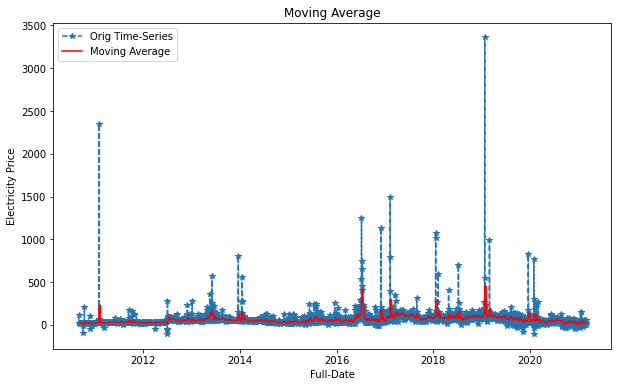

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(df_MA.index, df_MA.ElecPrice, '--', marker = '*', label = 'Orig Time-Series')
plt.plot(MA.index, MA, '-', color = 'red', label = 'Moving Average')
plt.xlabel("Full-Date")
plt.ylabel('Electricity Price')
plt.title("Moving Average")
plt.legend(loc = 'upper left')
plt.show()

**4. Time Series Exploratory Data Analysis**

In [39]:
# Statsmodels' API provides a comprehensive set of classes and functions that allow users to easily access and manipulate data,
# as well as build statistical models. It also includes a variety of visualization tools, including time series plots, boxplots, and scatterplots.

In [40]:
# seasonal_decompose decomposes a time series into trend, seasonality and noise in one line of code.

In [41]:
# Additive

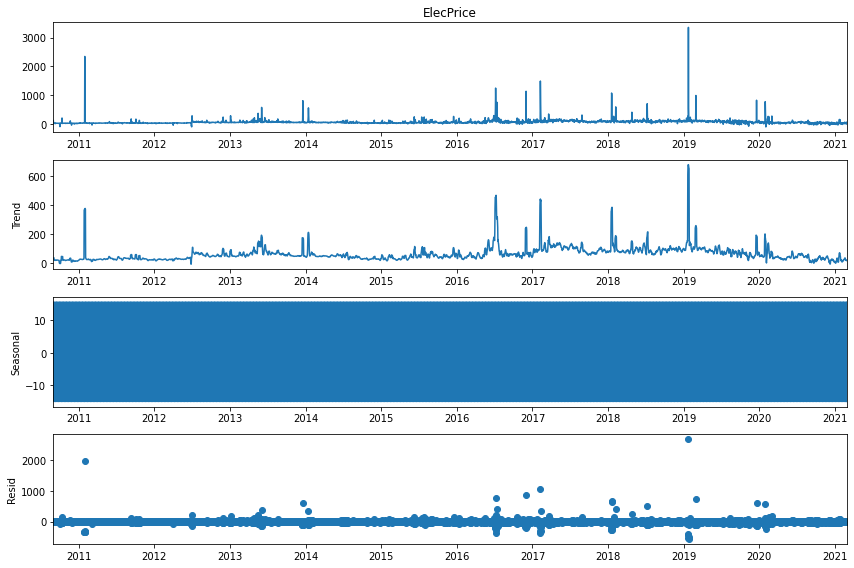

In [42]:
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] + S[t] + e[t]
rcParams['figure.figsize'] = 12, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['ElecPrice'], model = 'additive')
decompose_series.plot()
plt.show()

In [43]:
type(decompose_series)

statsmodels.tsa.seasonal.DecomposeResult

In [44]:
# Only resid, trend has nulls i.e. 6 seasonal has no nulls

In [45]:
decompose_series.resid

FullDate
2010-09-01          NaN
2010-09-02          NaN
2010-09-03          NaN
2010-09-04    -3.281894
2010-09-05    12.721896
                ...    
2021-02-24    -0.339167
2021-02-25   -11.410058
2021-02-26          NaN
2021-02-27          NaN
2021-02-28          NaN
Freq: D, Name: resid, Length: 3834, dtype: float64

In [46]:
decompose_series.resid.isnull().sum()

6

In [47]:
decompose_series.trend

FullDate
2010-09-01          NaN
2010-09-02          NaN
2010-09-03          NaN
2010-09-04    36.679018
2010-09-05    23.218839
                ...    
2021-02-24    22.167679
2021-02-25    19.776042
2021-02-26          NaN
2021-02-27          NaN
2021-02-28          NaN
Freq: D, Name: trend, Length: 3834, dtype: float64

In [48]:
decompose_series.trend.isnull().sum()

6

In [49]:
decompose_series.seasonal

FullDate
2010-09-01     4.620238
2010-09-02    15.697141
2010-09-03     2.591447
2010-09-04   -12.468999
2010-09-05   -15.084277
                ...    
2021-02-24     4.620238
2021-02-25    15.697141
2021-02-26     2.591447
2021-02-27   -12.468999
2021-02-28   -15.084277
Freq: D, Name: seasonal, Length: 3834, dtype: float64

In [50]:
decompose_series.seasonal.isnull().sum()

0

In [51]:
decompose_series.trend[decompose_series.trend.isnull()==True]

FullDate
2010-09-01   NaN
2010-09-02   NaN
2010-09-03   NaN
2021-02-26   NaN
2021-02-27   NaN
2021-02-28   NaN
Name: trend, dtype: float64

In [52]:
decompose_series.resid[decompose_series.resid.isnull()==True]

FullDate
2010-09-01   NaN
2010-09-02   NaN
2010-09-03   NaN
2021-02-26   NaN
2021-02-27   NaN
2021-02-28   NaN
Name: resid, dtype: float64

In [53]:
# The decomposed series shows slight increase in the trend thus, non-stationary
# We have initially plotted MA over last 12 months which varies with time
# So we shall perform 'ADF-test' to confirm this speculation

In [54]:
adf_res = adfuller(df.ElecPrice)

In [55]:
# adfuller: Augmented Dickey-Fuller test used for unit root in univariate process in process of serial correlation

In [56]:
# The adfuller function returns a tuple of statistics from the ADF test such as the Test Statistic, P-Value, Number of Lags Used, 
# Number of Observations used for the ADF regression
adf_res

(-31.952975699557843,
 0.0,
 53,
 91962,
 {'1%': -3.430421110703783,
  '5%': -2.8615714297867108,
  '10%': -2.56678672898094},
 1196013.0270263082)

In [218]:
adf_res = adfuller(df.GasPrice)
adf_res

(-2.902766697165181,
 0.045027212884625294,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 8685.261996278323)

In [57]:
adf_res[4]

{'1%': -3.430421110703783, '5%': -2.8615714297867108, '10%': -2.56678672898094}

In [58]:
adf_res[4].items()

dict_items([('1%', -3.430421110703783), ('5%', -2.8615714297867108), ('10%', -2.56678672898094)])

In [59]:
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
print(f'No. of lags used: {adf_res[2]}')
print(f'No. of observations used: {adf_res[3]}')
print('Critical values at each significance level:')
for key, val in adf_res[4].items():
  print(f'  {key}: {val}')
print(f'icbest-maximized information criterion: {adf_res[5]}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used: 91962
Critical values at each significance level:
  1%: -3.430421110703783
  5%: -2.8615714297867108
  10%: -2.56678672898094
icbest-maximized information criterion: 1196013.0270263082


In [217]:
adf_res = adfuller(df.SysLoad)
adf_res

(-3.6901589888366413,
 0.0042537255045741835,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 54930.737615237456)

In [60]:
# from the results obtained, the p-value is greater than the critial value at a 5% significance level 
# But ADF Statistic is less than critical value at 5% significance level
# Thus the data is non-stationary

In [61]:
df['SysLoad'].head()

0    1688.215
1    1669.195
2    1491.980
3    1330.760
4    1247.940
Name: SysLoad, dtype: float64

4.1 Convert time series into stationary by removing trend and seasonality

In [62]:
# Transformation and Differencing

# Transformation
df_log = np.log(df_daily)
df_diff = df_log.diff(periods = 1)

In [63]:
df_daily

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458
...                ...
2021-02-24   26.448750
2021-02-25   24.063125
2021-02-26   60.228958
2021-02-27   20.374167
2021-02-28   -4.124375

[3834 rows x 1 columns]

In [64]:
df_log

ElecPrice
FullDate             
2010-09-01   4.741920
2010-09-02   3.169003
2010-09-03   3.046455
2010-09-04   3.041094
2010-09-05   3.037664
...               ...
2021-02-24   3.275209
2021-02-25   3.180681
2021-02-26   4.098153
2021-02-27   3.014268
2021-02-28        NaN

[3834 rows x 1 columns]

In [65]:
df_diff

ElecPrice
FullDate             
2010-09-01        NaN
2010-09-02  -1.572918
2010-09-03  -0.122547
2010-09-04  -0.005361
2010-09-05  -0.003430
...               ...
2021-02-24   1.096747
2021-02-25  -0.094528
2021-02-26   0.917473
2021-02-27  -1.083886
2021-02-28        NaN

[3834 rows x 1 columns]

In [66]:
df_diff.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [67]:
df_diff.rolling(12).mean()

ElecPrice
FullDate             
2010-09-01        NaN
2010-09-02        NaN
2010-09-03        NaN
2010-09-04        NaN
2010-09-05        NaN
...               ...
2021-02-24   0.022468
2021-02-25   0.041792
2021-02-26   0.280616
2021-02-27  -0.000446
2021-02-28        NaN

[3834 rows x 1 columns]

In [68]:
df_diff.rolling(12).mean().isnull().sum()
# 488 rows are null

ElecPrice    488
dtype: int64

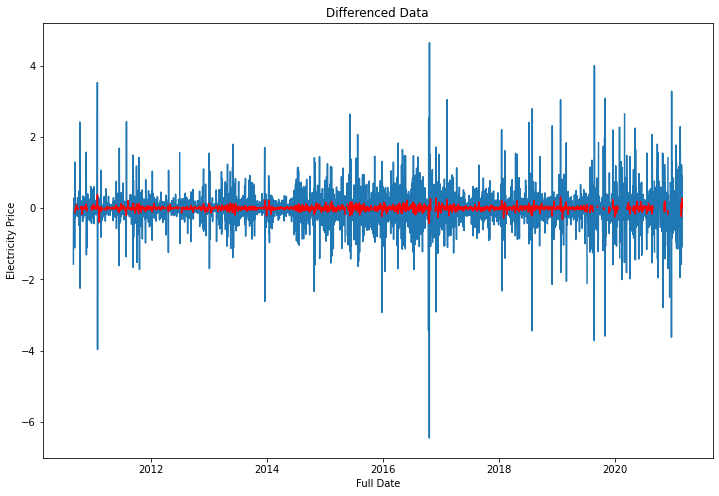

In [69]:
rcParams['figure.figsize'] = 12, 8
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')
plt.title('Differenced Data')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()

In [70]:
df_diff.dropna(inplace = True)

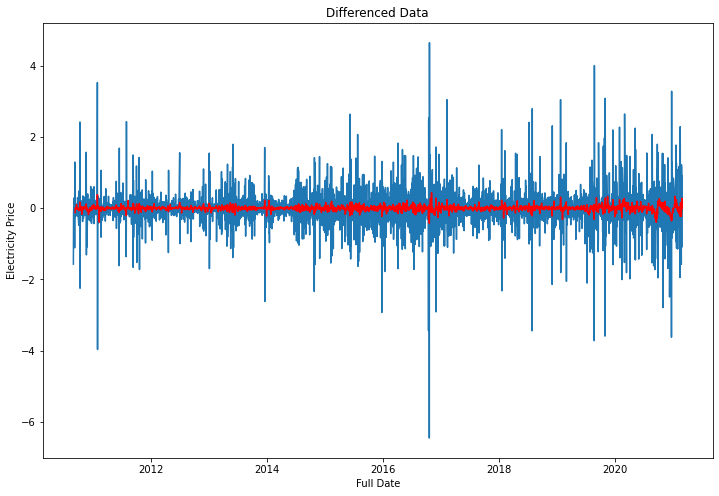

In [71]:
# By removing nulls we eliminated breaks in the plots
rcParams['figure.figsize'] = 12, 8
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')
plt.title('Differenced Data')
plt.xlabel('Full Date')
plt.ylabel('Electricity Price')
plt.show()

In [72]:
# df_diff.rolling(12).mean() gives the dataframe that is 'stationary'

**5. Time Series Forecasting using Stochastic Models**

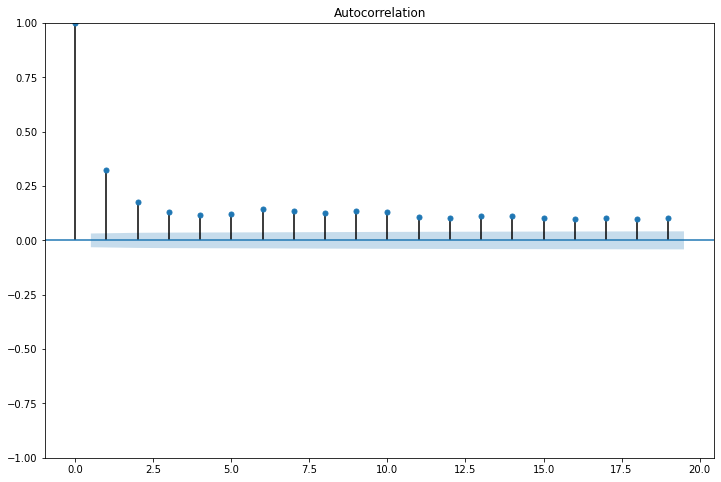

In [73]:
# ACF
plot_acf(df_daily, lags = range(0, 20))
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


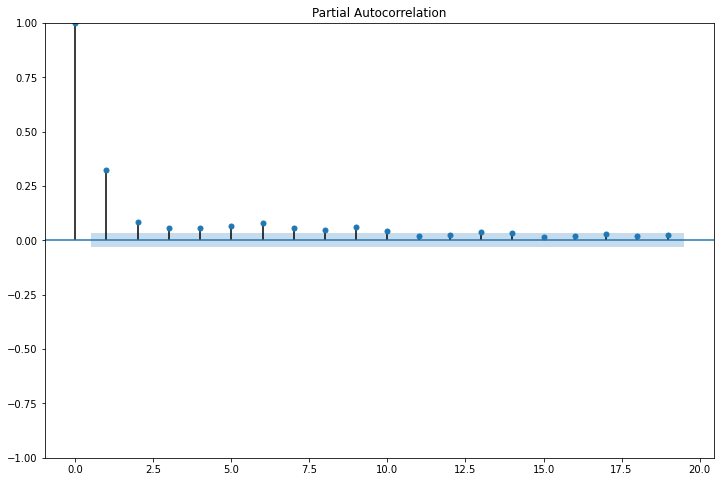

In [74]:
# PACF
plot_pacf(df_daily, lags = range(0, 20))
plt.show()

In [75]:
# The shaded regoins are the confidence intervals
# The lags where ACF, PACF plots cross this shaded regoin are the values of q, p respectively
# p=q=1

In [76]:
# Creating auto ARIMA models for the non-stationary time series than manually working with all the possible cases
# It returns the most optimal p, d, q paramters with fitted ARIMA model

In [77]:
# !pip install pmdarima

# Pyramid-ARIMA
# A statistical library designed to fill the void in Python's time series analysis capabilities.

In [78]:
# from pmdarima import auto_arima
stepwise_fit = auto_arima(df_daily['ElecPrice'], trace = True, suppress_warning = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45245.834, Time=6.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46992.745, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46347.966, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45424.608, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46990.746, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45243.870, Time=4.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45260.093, Time=2.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45243.535, Time=2.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45243.842, Time=3.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=46069.521, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45241.535, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45422.608, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=46345.967, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45241.842, Time=1.38 sec
 ARIMA(1,1,2)(0,0,0

In [79]:
# df_daily['ElecPrice'] is target(y) we want the model to forecast
# trace = True, asks to print status on the fits(Debugging info)
# suppress_warnings will suppress the warnings thrown inside statsmodels, but will not suppress UserWarnings

5.1 Train Test Split

In [80]:
df_daily

ElecPrice
FullDate              
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458
...                ...
2021-02-24   26.448750
2021-02-25   24.063125
2021-02-26   60.228958
2021-02-27   20.374167
2021-02-28   -4.124375

[3834 rows x 1 columns]

In [81]:
df_daily.shape

(3834, 1)

In [82]:
train_data = df_daily.iloc[:2757]
test_data = df_daily.iloc[2757:]

In [83]:
len(train_data)

2757

In [84]:
len(test_data)

1077

In [85]:
len(df_daily)-len(train_data) == len(test_data)

True

In [86]:
# from statsmodels.tsa.arima.model import ARIMA
# p, d, q

# creating optimal AR model
AR_model = ARIMA(train_data['ElecPrice'], order = (1, 1, 1))

In [87]:
AR_model_res = AR_model.fit()

In [88]:
AR_model_res.fittedvalues

FullDate
2010-09-01      0.000000
2010-09-02    114.310392
2010-09-03     55.786111
2010-09-04     45.883926
2010-09-05     40.655862
                 ...    
2018-03-15    103.590441
2018-03-16    107.002368
2018-03-17    101.300274
2018-03-18     93.629482
2018-03-19     84.536756
Freq: D, Length: 2757, dtype: float64

In [89]:
# Time Series made stationary

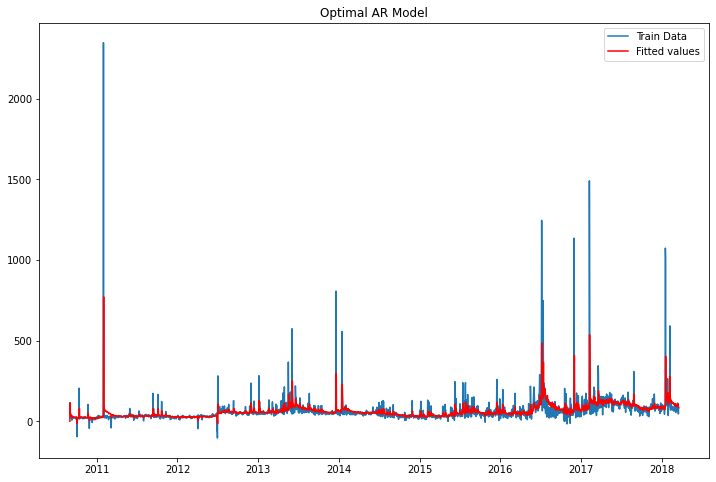

In [90]:
plt.plot(train_data, label = 'Train Data')
plt.plot(AR_model_res.fittedvalues, color='red', label = 'Fitted values')
plt.title("Optimal AR Model")
plt.legend(loc='best')
plt.show()

5.2 Predicting on the test data

In [91]:
start = len(train_data)
end = len(train_data)+len(test_data)-1

In [92]:
start

2757

In [93]:
end

3833

In [94]:
pred_data = AR_model_res.predict(start = start, end = end, exog = None, dynamic = False).rename('ARIMA Model Predictions')

In [95]:
# pred_data.index = df_diff.index[start:end+1]

In [96]:
print(pred_data)

2018-03-20     95.547212
2018-03-21     99.125637
2018-03-22    100.168017
2018-03-23    100.471658
2018-03-24    100.560108
                 ...    
2021-02-24    100.596463
2021-02-25    100.596463
2021-02-26    100.596463
2021-02-27    100.596463
2021-02-28    100.596463
Freq: D, Name: ARIMA Model Predictions, Length: 1077, dtype: float64


In [97]:
type(pred_data)

pandas.core.series.Series

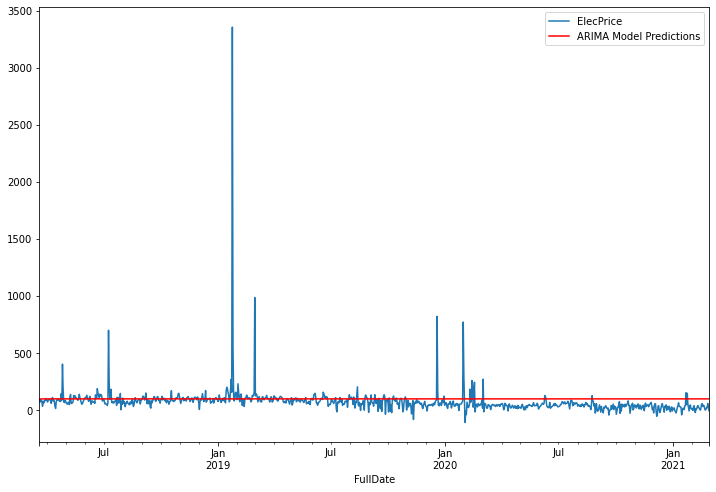

In [98]:
test_data['ElecPrice'].plot(legend = True)
pred_data.plot(legend = True, color = 'red')
plt.show()

In [99]:
# RMSE, MAPE to determine accuracy
test_data['ElecPrice'].mean()

74.72088691581553

In [100]:
len(pred_data)

1077

In [101]:
len(test_data)

1077

In [102]:
rmse = sqrt(mean_squared_error(pred_data, test_data['ElecPrice']))

In [103]:
print(rmse)

122.60631430373688


In [104]:
df_diff.ElecPrice.mean()

-0.0016477258077936868

In [105]:
# function to return the MAPE values
def calculate_MAPE(actual, predicted)->float:
  # Actual, Predicted has to be converted to numpy array datatype if not already
  if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
    actual, predicted = np.array(actual), np.array(predicted)

  # Calculate and return MAPE value
  return round(np.mean(np.abs((actual-predicted)/actual))*100, 2)

In [223]:
test_data

ds  Tmax     SysLoad  GasPrice          y
2757 2018-03-20  22.5  320.704637    8.3995  76.375000
2758 2018-03-21  23.8  194.085777    8.4690  72.103750
2759 2018-03-22  30.1  798.407719    8.4690  94.189583
2760 2018-03-23  33.8  753.768098    8.2769  89.115000
2761 2018-03-24  34.7  156.814110    7.5090  71.737500
...         ...   ...         ...       ...        ...
3829 2021-02-24  22.4  -63.562394    5.6000  26.448750
3830 2021-02-25  21.6  189.128273    5.4377  24.063125
3831 2021-02-26  22.8  396.542679    5.4242  60.228958
3832 2021-02-27  23.5  205.536673    5.4200  20.374167
3833 2021-02-28  24.3  278.127285    5.4848  -4.124375

[1077 rows x 5 columns]

In [224]:
calculate_MAPE(test_data['y'], pred_data)

391.19

In [106]:
''' Working with fbprophet '''

' Working with fbprophet '

fbprophet

In [110]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536041 sha256=7118863ce865ee3cc5b7e6e9592cf7581313594a6dd53da3feead8451f474cda
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

In [108]:
'''
 Prophet forecasts data by using either of the 2 models:
1. Logistic growth for non-linear data
2. Piecewise linear model for data with linear properties but selects the latter by default

y(t) = g(t) + s(t) + h(t) + ϵt
While 
y(t) is the forecast,
g(t) is the piecewise linear or logistic growth curve trend that models 'non-periodic' changes in time series,
s(t) represents the seasonality in the series for periodic changes,
h(t) allows for irregularities by factoring in the effects of specified holidays,
𝝐t is the error term in the model for unusual changes
'''

"\n Prophet forecasts data by using either of the 2 models:\n1. Logistic growth for non-linear data\n2. Piecewise linear model for data with linear properties but selects the latter by default\n\ny(t) = g(t) + s(t) + h(t) + ϵt\nWhile \ny(t) is the forecast,\ng(t) is the piecewise linear or logistic growth curve trend that models 'non-periodic' changes in time series,\ns(t) represents the seasonality in the series for periodic changes,\nh(t) allows for irregularities by factoring in the effects of specified holidays,\n𝝐t is the error term in the model for unusual changes\n"

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecast time series
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# metrics
from sklearn.metrics import mean_squared_error

from math import sqrt

In [112]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/Time_series_analysis_and_forecast_DATASET.csv")

In [113]:
df

FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]

In [114]:
df['FullDate'] = pd.to_datetime(df.FullDate)

In [115]:
df['FullDate']

0       2010-09-01 00:00:00
1       2010-09-01 01:00:00
2       2010-09-01 02:00:00
3       2010-09-01 03:00:00
4       2010-09-01 04:00:00
                ...        
92011   2021-02-28 19:00:00
92012   2021-02-28 20:00:00
92013   2021-02-28 21:00:00
92014   2021-02-28 22:00:00
92015   2021-02-28 23:00:00
Name: FullDate, Length: 92016, dtype: datetime64[ns]

In [116]:
df_curr = df[['FullDate', 'ElecPrice']]

In [117]:
df_curr

FullDate  ElecPrice
0     2010-09-01 00:00:00     23.710
1     2010-09-01 01:00:00     22.635
2     2010-09-01 02:00:00     22.565
3     2010-09-01 03:00:00     18.910
4     2010-09-01 04:00:00     18.030
...                   ...        ...
92011 2021-02-28 19:00:00    117.925
92012 2021-02-28 20:00:00     87.880
92013 2021-02-28 21:00:00     62.060
92014 2021-02-28 22:00:00     62.000
92015 2021-02-28 23:00:00     62.955

[92016 rows x 2 columns]

In [118]:
# Renaming to datestamp(ds) and target(y)
df_curr = df_curr.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'})

In [119]:
df_curr

ds        y
0     2010-09-01 00:00:00   23.710
1     2010-09-01 01:00:00   22.635
2     2010-09-01 02:00:00   22.565
3     2010-09-01 03:00:00   18.910
4     2010-09-01 04:00:00   18.030
...                   ...      ...
92011 2021-02-28 19:00:00  117.925
92012 2021-02-28 20:00:00   87.880
92013 2021-02-28 21:00:00   62.060
92014 2021-02-28 22:00:00   62.000
92015 2021-02-28 23:00:00   62.955

[92016 rows x 2 columns]

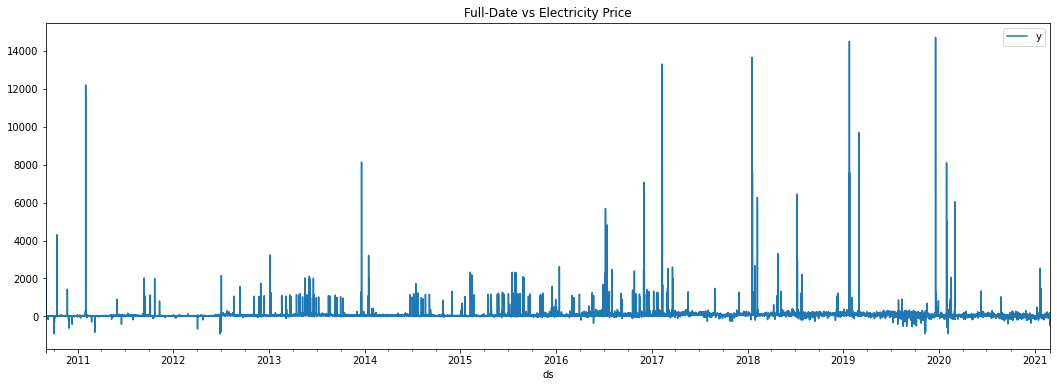

In [120]:
df_curr.plot(x = 'ds', y = 'y', figsize = (18, 6))
plt.title("Full-Date vs Electricity Price")
plt.show()

In [121]:
df_curr.shape

(92016, 2)

In [122]:
df_curr

ds        y
0     2010-09-01 00:00:00   23.710
1     2010-09-01 01:00:00   22.635
2     2010-09-01 02:00:00   22.565
3     2010-09-01 03:00:00   18.910
4     2010-09-01 04:00:00   18.030
...                   ...      ...
92011 2021-02-28 19:00:00  117.925
92012 2021-02-28 20:00:00   87.880
92013 2021-02-28 21:00:00   62.060
92014 2021-02-28 22:00:00   62.000
92015 2021-02-28 23:00:00   62.955

[92016 rows x 2 columns]

In [123]:
df_curr.set_index( "ds" , inplace= True ) 
df_curr.head()

y
ds                         
2010-09-01 00:00:00  23.710
2010-09-01 01:00:00  22.635
2010-09-01 02:00:00  22.565
2010-09-01 03:00:00  18.910
2010-09-01 04:00:00  18.030

In [124]:
# Resampling (Downsampling) to Daily(D)
df_curr = df_curr.resample('D').mean()

In [125]:
df_curr

y
ds                    
2010-09-01  114.654167
2010-09-02   23.783750
2010-09-03   21.040625
2010-09-04   20.928125
2010-09-05   20.856458
...                ...
2021-02-24   26.448750
2021-02-25   24.063125
2021-02-26   60.228958
2021-02-27   20.374167
2021-02-28   -4.124375

[3834 rows x 1 columns]

In [126]:
# Reset the index after downsampling to Daily basis
df_curr.reset_index(inplace = True)

In [127]:
# Train Test split
train_data = df_curr.iloc[:2757]
test_data = df_curr.iloc[2757:]

In [128]:
len(train_data)

2757

In [129]:
len(test_data)

1077

In [130]:
train_data.shape

(2757, 2)

In [131]:
model = Prophet()

In [132]:
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
future = model.make_future_dataframe(periods = 1077)

In [134]:
future

ds
0    2010-09-01
1    2010-09-02
2    2010-09-03
3    2010-09-04
4    2010-09-05
...         ...
3829 2021-02-24
3830 2021-02-25
3831 2021-02-26
3832 2021-02-27
3833 2021-02-28

[3834 rows x 1 columns]

In [135]:
forecast = model.predict(future)

In [136]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-09-01   36.060889  -58.801619  141.262730    36.060889    36.060889   
1    2010-09-02   36.055315  -50.847397  147.815804    36.055315    36.055315   
2    2010-09-03   36.049741  -60.534596  129.244455    36.049741    36.049741   
3    2010-09-04   36.044166  -79.347006  115.752763    36.044166    36.044166   
4    2010-09-05   36.038592  -77.721721  124.849309    36.038592    36.038592   
...         ...         ...         ...         ...          ...          ...   
3829 2021-02-24  148.106924   26.179551  266.186338    80.531087   218.705379   
3830 2021-02-25  148.140548   16.850467  273.284399    80.395980   218.839936   
3831 2021-02-26  148.174172   15.462050  265.992490    80.260872   218.974493   
3832 2021-02-27  148.207795    0.027754  243.731815    80.125764   219.109050   
3833 2021-02-28  148.241419    7.542242  239.843963    79.990656   219.243608   

      additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0           5.956974              5.956974              5.956974   6.639672   
1           9.301148              9.301148              9.301148  10.712934   
2          -0.077000             -0.077000             -0.077000   2.094555   
3         -14.258741            -14.258741            -14.258741 -11.310738   
4         -18.009091            -18.009091            -18.009091 -14.280776   
...              ...                   ...                   ...        ...   
3829       -3.641192             -3.641192             -3.641192   6.639672   
3830       -0.892232             -0.892232             -0.892232  10.712934   
3831      -10.645691            -10.645691            -10.645691   2.094555   
3832      -24.988717            -24.988717            -24.988717 -11.310738   
3833      -28.694891            -28.694891            -28.694891 -14.280776   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0         6.639672      6.639672  -0.682697     -0.682697     -0.682697   
1        10.712934     10.712934  -1.411786     -1.411786     -1.411786   
2         2.094555      2.094555  -2.171555     -2.171555     -2.171555   
3       -11.310738    -11.310738  -2.948003     -2.948003     -2.948003   
4       -14.280776    -14.280776  -3.728315     -3.728315     -3.728315   
...            ...           ...        ...           ...           ...   
3829      6.639672      6.639672 -10.280864    -10.280864    -10.280864   
3830     10.712934     10.712934 -11.605167    -11.605167    -11.605167   
3831      2.094555      2.094555 -12.740246    -12.740246    -12.740246   
3832    -11.310738    -11.310738 -13.677978    -13.677978    -13.677978   
3833    -14.280776    -14.280776 -14.414114    -14.414114    -14.414114   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3829                   0.0                         0.0   
3830                   0.0                         0.0   
3831                   0.0                         0.0   
3832                   0.0                         0.0   
3833                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   42.017864  
1                            0.0   45.356463  
2                            0.0   35.972740  
3                            0.0   21.785425  
4                            0.0   18.029501  
...                          ...         ...  
3829                         0.0  144.465732  
3830                         0.0  147.248316  
3831                         0.0  137.528481  
3832                   

In [137]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [138]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
3829 2021-02-24  144.465732   26.179551  266.186338
3830 2021-02-25  147.248316   16.850467  273.284399
3831 2021-02-26  137.528481   15.462050  265.992490
3832 2021-02-27  123.219079    0.027754  243.731815
3833 2021-02-28  119.546529    7.542242  239.843963

In [139]:
test_data.tail()

ds          y
3829 2021-02-24  26.448750
3830 2021-02-25  24.063125
3831 2021-02-26  60.228958
3832 2021-02-27  20.374167
3833 2021-02-28  -4.124375

In [140]:
plot_plotly(model, forecast)

In [141]:
plot_components_plotly(model, forecast)

In [142]:
fore = forecast.iloc[2757:]

In [143]:
fore.shape

(1077, 19)

In [144]:
test_data.shape

(1077, 2)

In [145]:
test_data['y'].mean()

74.72088691581553

In [146]:
rmse = sqrt(mean_squared_error(fore['yhat'], test_data['y']))

In [147]:
print(rmse)

133.91976300010188


In [148]:
mape = calculate_MAPE(test_data['y'], fore['yhat'])

In [149]:
print(mape)

547.91


Multivariate Analysis

In [150]:
# Multivariate Analysis
df.head()

FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0 2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1 2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2 2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3 2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4 2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [151]:
df['FullDate'] = pd.to_datetime(df.FullDate)

In [152]:
df = df.set_index("FullDate")

In [153]:
df.head()

Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [154]:
df = df.resample('D').mean()

In [155]:
df

Tmax      SysLoad  GasPrice   ElecPrice
FullDate                                           
2010-09-01  15.8  1731.890833    3.6900  114.654167
2010-09-02  15.4  1620.791250    3.6900   23.783750
2010-09-03  18.3  1736.073333    4.4500   21.040625
2010-09-04  13.7  1484.920208    3.3900   20.928125
2010-09-05  14.9  1483.808750    4.4500   20.856458
...          ...          ...       ...         ...
2021-02-24  22.4   -63.562394    5.6000   26.448750
2021-02-25  21.6   189.128273    5.4377   24.063125
2021-02-26  22.8   396.542679    5.4242   60.228958
2021-02-27  23.5   205.536673    5.4200   20.374167
2021-02-28  24.3   278.127285    5.4848   -4.124375

[3834 rows x 4 columns]

In [156]:
# Reset the index after downsampling to Daily basis
df.reset_index(inplace = True)

In [157]:
df

FullDate  Tmax      SysLoad  GasPrice   ElecPrice
0    2010-09-01  15.8  1731.890833    3.6900  114.654167
1    2010-09-02  15.4  1620.791250    3.6900   23.783750
2    2010-09-03  18.3  1736.073333    4.4500   21.040625
3    2010-09-04  13.7  1484.920208    3.3900   20.928125
4    2010-09-05  14.9  1483.808750    4.4500   20.856458
...         ...   ...          ...       ...         ...
3829 2021-02-24  22.4   -63.562394    5.6000   26.448750
3830 2021-02-25  21.6   189.128273    5.4377   24.063125
3831 2021-02-26  22.8   396.542679    5.4242   60.228958
3832 2021-02-27  23.5   205.536673    5.4200   20.374167
3833 2021-02-28  24.3   278.127285    5.4848   -4.124375

[3834 rows x 5 columns]

In [158]:
df.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'}, inplace = True)

In [159]:
df

ds  Tmax      SysLoad  GasPrice           y
0    2010-09-01  15.8  1731.890833    3.6900  114.654167
1    2010-09-02  15.4  1620.791250    3.6900   23.783750
2    2010-09-03  18.3  1736.073333    4.4500   21.040625
3    2010-09-04  13.7  1484.920208    3.3900   20.928125
4    2010-09-05  14.9  1483.808750    4.4500   20.856458
...         ...   ...          ...       ...         ...
3829 2021-02-24  22.4   -63.562394    5.6000   26.448750
3830 2021-02-25  21.6   189.128273    5.4377   24.063125
3831 2021-02-26  22.8   396.542679    5.4242   60.228958
3832 2021-02-27  23.5   205.536673    5.4200   20.374167
3833 2021-02-28  24.3   278.127285    5.4848   -4.124375

[3834 rows x 5 columns]

In [160]:
# Train Test Split
train_data = df.iloc[:2757]
test_data = df.iloc[2757:]

In [161]:
train_data.shape

(2757, 5)

In [162]:
test_data.shape

(1077, 5)

In [163]:
# adding other 3 columns as regressors to the model
multi_model = Prophet()
multi_model.add_regressor('Tmax')
multi_model.add_regressor('SysLoad')
multi_model.add_regressor('GasPrice')

In [164]:
multi_model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [165]:
future = model.make_future_dataframe(periods = 1077)

In [166]:
future

ds
0    2010-09-01
1    2010-09-02
2    2010-09-03
3    2010-09-04
4    2010-09-05
...         ...
3829 2021-02-24
3830 2021-02-25
3831 2021-02-26
3832 2021-02-27
3833 2021-02-28

[3834 rows x 1 columns]

In [167]:
forecast = model.predict(future)

In [168]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-09-01   36.060889  -59.904375  138.250808    36.060889    36.060889   
1    2010-09-02   36.055315  -51.672868  146.121887    36.055315    36.055315   
2    2010-09-03   36.049741  -65.144382  133.322416    36.049741    36.049741   
3    2010-09-04   36.044166  -78.715344  119.807892    36.044166    36.044166   
4    2010-09-05   36.038592  -78.883505  118.766156    36.038592    36.038592   
...         ...         ...         ...         ...          ...          ...   
3829 2021-02-24  148.106924   28.620154  266.585272    74.602830   220.172520   
3830 2021-02-25  148.140548   21.130238  275.121684    74.602411   220.359225   
3831 2021-02-26  148.174172    6.428632  260.486987    74.601992   220.545931   
3832 2021-02-27  148.207795   -8.045734  244.666764    74.591270   220.732636   
3833 2021-02-28  148.241419   -4.478406  252.381918    74.555787   220.919341   

      additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0           5.956974              5.956974              5.956974   6.639672   
1           9.301148              9.301148              9.301148  10.712934   
2          -0.077000             -0.077000             -0.077000   2.094555   
3         -14.258741            -14.258741            -14.258741 -11.310738   
4         -18.009091            -18.009091            -18.009091 -14.280776   
...              ...                   ...                   ...        ...   
3829       -3.641192             -3.641192             -3.641192   6.639672   
3830       -0.892232             -0.892232             -0.892232  10.712934   
3831      -10.645691            -10.645691            -10.645691   2.094555   
3832      -24.988717            -24.988717            -24.988717 -11.310738   
3833      -28.694891            -28.694891            -28.694891 -14.280776   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0         6.639672      6.639672  -0.682697     -0.682697     -0.682697   
1        10.712934     10.712934  -1.411786     -1.411786     -1.411786   
2         2.094555      2.094555  -2.171555     -2.171555     -2.171555   
3       -11.310738    -11.310738  -2.948003     -2.948003     -2.948003   
4       -14.280776    -14.280776  -3.728315     -3.728315     -3.728315   
...            ...           ...        ...           ...           ...   
3829      6.639672      6.639672 -10.280864    -10.280864    -10.280864   
3830     10.712934     10.712934 -11.605167    -11.605167    -11.605167   
3831      2.094555      2.094555 -12.740246    -12.740246    -12.740246   
3832    -11.310738    -11.310738 -13.677978    -13.677978    -13.677978   
3833    -14.280776    -14.280776 -14.414114    -14.414114    -14.414114   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3829                   0.0                         0.0   
3830                   0.0                         0.0   
3831                   0.0                         0.0   
3832                   0.0                         0.0   
3833                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   42.017864  
1                            0.0   45.356463  
2                            0.0   35.972740  
3                            0.0   21.785425  
4                            0.0   18.029501  
...                          ...         ...  
3829                         0.0  144.465732  
3830                         0.0  147.248316  
3831                         0.0  137.528481  
3832                   

In [169]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
3829 2021-02-24  144.465732   28.620154  266.585272
3830 2021-02-25  147.248316   21.130238  275.121684
3831 2021-02-26  137.528481    6.428632  260.486987
3832 2021-02-27  123.219079   -8.045734  244.666764
3833 2021-02-28  119.546529   -4.478406  252.381918

In [170]:
test_data.tail()

ds  Tmax     SysLoad  GasPrice          y
3829 2021-02-24  22.4  -63.562394    5.6000  26.448750
3830 2021-02-25  21.6  189.128273    5.4377  24.063125
3831 2021-02-26  22.8  396.542679    5.4242  60.228958
3832 2021-02-27  23.5  205.536673    5.4200  20.374167
3833 2021-02-28  24.3  278.127285    5.4848  -4.124375

In [171]:
plot_plotly(multi_model, forecast)

In [172]:
plot_components_plotly(multi_model, forecast)

In [173]:
test_data['y'].mean()

74.72088691581553

In [174]:
forecast['yhat'].shape

(3834,)

In [175]:
fore = forecast[2757:]

In [176]:
len(fore)

1077

In [177]:
rmse = sqrt(mean_squared_error(fore['yhat'], test_data['y']))

In [178]:
print(rmse)

133.91976300010188


In [179]:
forecast.shape

(3834, 19)

In [180]:
fore.shape

(1077, 19)

In [181]:
test_data.shape

(1077, 5)

In [182]:
mape = calculate_MAPE(test_data['y'], fore['yhat'])

In [183]:
print(mape)

547.91


Working with 2 regressors

In [190]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time series/Time_series_analysis_and_forecast_DATASET.csv")

In [191]:
df

FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]

In [192]:
df['FullDate'] = pd.to_datetime(df.FullDate)

In [193]:
df = df.set_index("FullDate") 
df.head()

Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030

In [194]:
df = df.resample('D').mean()
df.reset_index(inplace = True)
df.head()

FullDate  Tmax      SysLoad  GasPrice   ElecPrice
0 2010-09-01  15.8  1731.890833      3.69  114.654167
1 2010-09-02  15.4  1620.791250      3.69   23.783750
2 2010-09-03  18.3  1736.073333      4.45   21.040625
3 2010-09-04  13.7  1484.920208      3.39   20.928125
4 2010-09-05  14.9  1483.808750      4.45   20.856458

In [195]:
df.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)
df.head()

ds  Tmax      SysLoad  GasPrice           y
0 2010-09-01  15.8  1731.890833      3.69  114.654167
1 2010-09-02  15.4  1620.791250      3.69   23.783750
2 2010-09-03  18.3  1736.073333      4.45   21.040625
3 2010-09-04  13.7  1484.920208      3.39   20.928125
4 2010-09-05  14.9  1483.808750      4.45   20.856458

In [196]:
train_data = df.iloc[:2757]
test_data = df.iloc[2757:]
print(train_data.shape, test_data.shape)

(2757, 5) (1077, 5)


In [216]:
train_data

ds      SysLoad  GasPrice           y
0    2010-09-01  1731.890833    3.6900  114.654167
1    2010-09-02  1620.791250    3.6900   23.783750
2    2010-09-03  1736.073333    4.4500   21.040625
3    2010-09-04  1484.920208    3.3900   20.928125
4    2010-09-05  1483.808750    4.4500   20.856458
...         ...          ...       ...         ...
2752 2018-03-15  1130.792744    9.1928  113.222500
2753 2018-03-16   821.269333    9.0400   94.888958
2754 2018-03-17    44.972794    8.7100   71.599375
2755 2018-03-18  -170.934915    8.4995   45.333958
2756 2018-03-19   363.808310    8.3030   83.262708

[2757 rows x 4 columns]

In [213]:
multi1_model = Prophet()
multi1_model.add_regressor('SysLoad')
multi1_model.add_regressor('GasPrice')
multi1_model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
train_data.drop(columns=['Tmax'], inplace = True)

In [215]:
future = multi1_model.make_future_dataframe(periods=1077)
forecast = multi1_model.predict(future)

ValueError: ignored

In [209]:
fore = forecast.iloc[2757:]

In [210]:
plot_plotly(multi1_model, forecast)

In [211]:
plot_components_plotly(multi1_model, forecast)

In [212]:
rmse=sqrt(mean_squared_error(fore['yhat'], test_data['y']))
print(rmse)

133.91976300010188
